In [1]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
promise_zones= gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones.head(7)

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((1716935.654 667534.495, 1716992.481 ..."


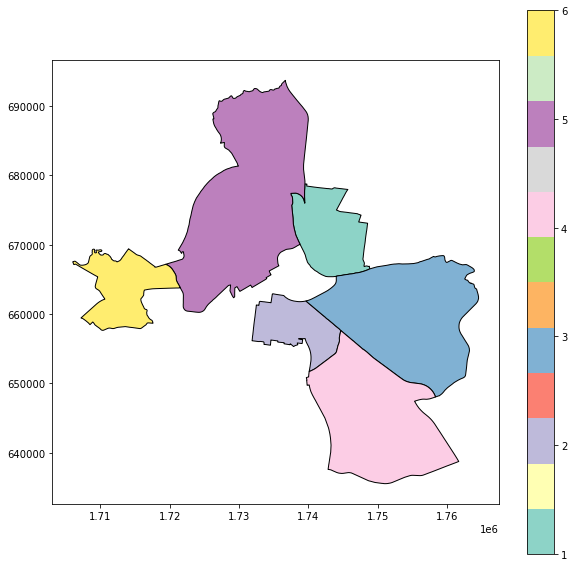

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

promise_zones.plot(column = 'ZONE_ID', figsize=(10, 10),
              edgecolor = 'black',
              legend = True,
              cmap = 'Set3')
plt.show()

In [8]:
julyt_pkl = pd.read_pickle('../data/july_trips.pkl')
print(julyt_pkl.shape)
julyt_pkl.head()

(134926, 10)


,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.0,0.0,36.1775,36.1778,-86.7516,-86.7514
1,2019-07-01 00:02:52.213,BRD5177,"[[36.162718,-86.771102],[36.162718,-86.771102]]",Powered22JF6,0.0,0.0,36.1627,36.1627,-86.7711,-86.7711
2,2019-07-01 00:02:52.213,BRD5176,"[[36.162734,-86.77122],[36.162706,-86.771325],...",Powered22JF6,1.0,0.0,36.1627,36.1627,-86.7713,-86.7713
3,2019-07-01 00:02:52.213,BRD5178,"[[36.152499,-86.798708]]",PoweredIB2CC,1.0,0.0,36.1525,36.1525,-86.7988,-86.7988
4,2019-07-01 00:02:52.213,BRD5180,"[[36.157523,-86.775794]]",PoweredW4G7R,2.0,0.0,36.1578,36.1575,-86.7760,-86.7758


In [9]:
julyt_pkl['geometry'] = julyt_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
julyt_pkl.head(3)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.0,0.0,36.1775,36.1778,-86.7516,-86.7514,POINT (-86.7516 36.1775)
1,2019-07-01 00:02:52.213,BRD5177,"[[36.162718,-86.771102],[36.162718,-86.771102]]",Powered22JF6,0.0,0.0,36.1627,36.1627,-86.7711,-86.7711,POINT (-86.7711 36.1627)
2,2019-07-01 00:02:52.213,BRD5176,"[[36.162734,-86.77122],[36.162706,-86.771325],...",Powered22JF6,1.0,0.0,36.1627,36.1627,-86.7713,-86.7713,POINT (-86.7713 36.1627)


In [10]:
promise_zones.crs

<Projected CRS: EPSG:2274>
Name: NAD83 / Tennessee (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Tennessee
- bounds: (-90.31, 34.98, -81.65, 36.68)
Coordinate Operation:
- name: SPCS83 Tennessee zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
julyt_scooter_geo = gpd.GeoDataFrame(julyt_pkl, 
                           crs = promise_zones.crs, 
                           geometry = julyt_pkl['geometry'])

In [ ]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [15]:
scoots_by_zone = gpd.sjoin(julyt_scooter_geo, promise_zones, op = 'within')
scoots_by_zone.head(5)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe


,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
